# Transfer Learning Assignment

Download all the data in this <a href='https://drive.google.com/open?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu'>rar_file</a> , it contains all the data required for the assignment.
 When you unrar the file you'll get the files in the following format: <b>path/to/the/image.tif,category</b>
            
    where the categories are numbered 0 to 15, in the following order:
<pre>
    <b>0 letter
    1 form
    2 email
    3 handwritten
    4 advertisement
    5 scientific report
    6 scientific publication
    7 specification
    8 file folder
    9 news article
    10 budget
    11 invoice
    12 presentation
    13 questionnaire
    14 resume
    15 memo</b>
    
</pre>

There is a file named as 'labels_final.csv' , it consists of two columns. First column is path which is the required path to the images and second is the class label.

In [1]:
#the dataset that you are dealing with is quite large 3.7 GB and hence there are two methods to import the data to Colab
# Method 1- you can use gdown module to get the data directly from Google drive to Colab
# the syntax is as follows !gdown --id file_id , for ex - running the below cell will import the rvl-cdip.rar dataset


In [2]:
# !gdown --id 1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu

In [3]:
# Method -2 you can also import the data using wget function
#https://www.youtube.com/watch?v=BPUfVq7RaY8

In [4]:
!wget --header="Host: drive.usercontent.google.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/121.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-IN,en;q=0.9" --header="Cookie: S=billing-ui-v3=mnMZMNJwDoqACZLdhxtjhcR_oLooFu2f:billing-ui-v3-efe=mnMZMNJwDoqACZLdhxtjhcR_oLooFu2f:maestro=Oqz_Yy_Je4P5s79gBKQTch4ttVH2Ild_8EhJn3XQXhw; OGP=-19031986:-19024362:; OGPC=19036484-1:19031986-1:19024362-1:19037049-1:; SID=fQiL6Ev14lwRVeJGTHiO4m-GC-Z3hFwEEfV-CmNNyBITmmUAri8U6GJbXK-deEkLh3ZdeQ.; __Secure-1PSID=fQiL6Ev14lwRVeJGTHiO4m-GC-Z3hFwEEfV-CmNNyBITmmUAOmQ2C4su4iBAe8KdQsnaQA.; __Secure-3PSID=fQiL6Ev14lwRVeJGTHiO4m-GC-Z3hFwEEfV-CmNNyBITmmUAAM70ANrIOTciWICIfUasXw.; HSID=AdNvdHbmZKszk2Pvy; SSID=ARfEGSww1N36rk0iw; APISID=eKNBnrisZK9jXU_1/AoX2wFjXaJ6Sq-Xd1; SAPISID=55QspWWx8b4VEyaK/AFRuQkoK16pNQdQjt; __Secure-1PAPISID=55QspWWx8b4VEyaK/AFRuQkoK16pNQdQjt; __Secure-3PAPISID=55QspWWx8b4VEyaK/AFRuQkoK16pNQdQjt; AEC=Ae3NU9MhpX_0jXa4YUfnQ0NEYS8d3IAbcGY8oNLH5TJmEdgkrm3FSkzA1g; 1P_JAR=2024-01-29-15; NID=511=vTquMkgh0wH8VFC0mlQZMEoKi_4CRHCCPPlX56vpHs2efHALjWdWgDspnv1MGCODZ2LJq-nNr614XuhO2T7wjwGrtkGZv4ylrx72hr-qZdPOlnnLcxOIS7SE0kwyFI986dejbaCLAcx-ml7B0UTkYauFaqQb5XkFM0R1NLz2LB1keKzDfSEaqhx4ru7kUArA7gYsW0dB8cG4DO7KqC_0aMXiRQXwV00Tc10q8io37Qp_ICp9SW8iKHZFlX5mfJasOJrmR82zIFWXB7uLDTzpxVhqPL7E7hVPy92-trlrKOURtIG5eqmsiMzwu3UJ1Lw-sd48oMb-3wda08yCApig5GleoXj3jhBQ1DjbwrG-EX-NISHnFzGUcsJxH5xRDCYinH1oUjWDPPtq1ifEgznbPHUaFMhn82t-t94HUfdKUI2QErX0b-yUx-azSg3kSRTvTumz8YBaX0goy7y7KxO9Vn-CA99CKzx1utdqVk--skyWNxJnz3tj8j91W8K0aRFLuTdzu8Mi3EkvcGBFN_7RpmtX6UBD_2KoDPaophOjwKbzYCBA07ziP6nJLsD_AWsyRYsVFPLQxtBgQiE-O8fo1_lhmi8jBzxhWTR2fQATDyAp0dgwi99E3t-1swXxK5AyAvm4WxJW25Ww6jCaYSMhK-7weDVt8wEU-LTLrnXpAqZFfJjpgwnto5rPZzpRaZ_57Mx9WiJD-pTcTTd0Q3646Epy7KYpKcQ8640hzfRKJnbgrL-fdN5Tpz8YhP1wMsVMOmm30AiS1AbJPPeKUVSVBFWD_ASjscrIYpcEB2XwtdS3l18_z95OnNWPTI301OWqNi9d0YaEdgXcSj2AIfX2Nl9aQFwApwq3eDEzCcUZkXqngSi1vorb010RrGip-Gc5Hqm6po3OD5s7cxlf_fO9Hj4FX8o-dQkGjN6OGXt0IsXBfqzjS4D4HHuZU-D4ryG-lGVyef7r67Z-N0EyqsWIh7olvzwGrQTP7iMDY_uwMADVWPdsO4B1YUVsva7HvdQTxH2oi9rlmfK3uWd2CCmnR_fg8-ZJfLCKT7NY88GFAUaQYBkue76TkoSRNC8c6RUh9Pnmxd5SrWOnXuUf6WgKVHS9MJYR; __Secure-1PSIDTS=sidts-CjIBPVxjSrG41Ny0yf-0peDq84b2Zzb4LtJx7xv2PCxkKzuJ0YtuzPBIKhjjMMzEON4mZxAA; __Secure-3PSIDTS=sidts-CjIBPVxjSrG41Ny0yf-0peDq84b2Zzb4LtJx7xv2PCxkKzuJ0YtuzPBIKhjjMMzEON4mZxAA; SIDCC=ABTWhQEF907EZ3PciGnYBL3Zl214QJ4PwCxFQUujehidtJmw55JOOgYai6-MjEi3lFIaUc2Hjuk; __Secure-1PSIDCC=ABTWhQFF7kmirjhB4eQyTCTICdMjS35H1-DW7rQCc3Vrf41EiD6SUOJQfwNIUEzNFOyRUUwZKeqa; __Secure-3PSIDCC=ABTWhQEYxIIFHWYcDT_WBgCQnZOJojyz8wBZRdJYoE4Gxmawl9b_unvWBupeD-HLe8V9-w5ozKA" --header="Connection: keep-alive" "https://drive.usercontent.google.com/download?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu&authuser=0&confirm=t&uuid=f7315cd2-50cc-4444-996c-04786e8cf991&at=APZUnTX34yW1n-6-1obesjJNbOmi%3A1706542366996" -c -O 'rvl-cdip.rar'

--2024-01-31 12:07:00--  https://drive.usercontent.google.com/download?id=1Z4TyI7FcFVEx8qdl4jO9qxvxaqLSqoEu&authuser=0&confirm=t&uuid=f7315cd2-50cc-4444-996c-04786e8cf991&at=APZUnTX34yW1n-6-1obesjJNbOmi%3A1706542366996
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.63.132, 2607:f8b0:4004:c08::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.63.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4660541790 (4.3G) [application/octet-stream]
Saving to: ‘rvl-cdip.rar’

rvl-cdip.rar        100%[===================>]   4.34G   122MB/s    in 51s     

2024-01-31 12:07:52 (87.0 MB/s) - ‘rvl-cdip.rar’ saved [4660541790/4660541790]



In [5]:
#unrar the file
get_ipython().system_raw("unrar x rvl-cdip.rar")

## 2. On this image data, you have to train 3 types of models as given below You have to split the data into Train and Validation data.

In [6]:
#import all the required libraries
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

df=pd.read_csv('labels_final.csv',dtype=str)
df.head()

,path,label
0,imagesv/v/o/h/voh71d00/509132755+-2755.tif,3
1,imagesl/l/x/t/lxt19d00/502213303.tif,3
2,imagesx/x/e/d/xed05a00/2075325674.tif,2
3,imageso/o/j/b/ojb60d00/517511301+-1301.tif,3
4,imagesq/q/z/k/qzk17e00/2031320195.tif,7


In [7]:
df.shape

(48000, 2)

We have 48000 images in total

In [8]:
label_counts = df['label'].value_counts()
for i in range(len(label_counts)):
  print(f"No of Images in {label_counts.index[i]} category is {label_counts[i]}")

No of Images in 0 category is 3016
No of Images in 13 category is 3007
No of Images in 14 category is 3006
No of Images in 12 category is 3006
No of Images in 3 category is 3005
No of Images in 8 category is 3003
No of Images in 10 category is 3002
No of Images in 9 category is 3002
No of Images in 7 category is 3000
No of Images in 5 category is 2999
No of Images in 15 category is 2996
No of Images in 4 category is 2994
No of Images in 1 category is 2994
No of Images in 2 category is 2993
No of Images in 11 category is 2992
No of Images in 6 category is 2985


In [9]:
# This code converts the tif images to jpg images.
from PIL import Image
import os
import time


def convert_tiff_to_jpg(tiff_path, jpg_path):
    # Open TIFF image
    tiff_image = Image.open(tiff_path)

    # Save as JPEG
    tiff_image.convert('RGB').save(jpg_path, 'JPEG')

# Convert each TIFF image in the folder to JPEG
for i in range(df.shape[0]):
    file_path = df['path'].iloc[i]
    if file_path.endswith('.tif') or file_path.endswith('.tiff'):
        tiff_path = os.path.join('/content/data_final', file_path)
        jpg_file = os.path.splitext(file_path)[0] + '.jpg'
        jpg_path = os.path.join('/content/data_final', jpg_file)

        convert_tiff_to_jpg(tiff_path, jpg_path)

In [10]:
img = cv2.imread(os.path.join('/content/data_final', 'imagesk/k/q/l/kql82f00/tob07414.87.jpg'))
img.shape

(1000, 782, 3)

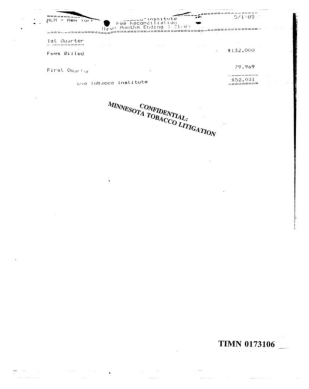

In [11]:
# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()

In [12]:
image_path = os.path.join('/content/data_final', df['path'].iloc[0])
image_path

'/content/data_final/imagesv/v/o/h/voh71d00/509132755+-2755.tif'

In [13]:
# #import openCV
# import cv2

# ##Getting size of images
# list_of_heights = []
# list_of_widths = []
# for i in range(df.shape[0]):
#     image_path = os.path.join('/content/data_final', df['path'].iloc[i])
#     img = cv2.imread(os.path.join('/content/data_final',image_path), cv2.IMREAD_UNCHANGED)
#     # get dimensions of image
#     shape = img.shape
#     list_of_heights.append(shape[0])
#     list_of_widths.append(shape[1])

In [14]:
# set(list_of_heights)

From the above we can observe that there is only one value in the height range, so mean and median of image_height is 1000.

In [15]:
# %matplotlib inline

# plt.hist(list_of_widths, bins = 20)
# plt.xlim(0,1500)
# plt.title('widths')

In [16]:
# import numpy as np

# print("The minimum value of images is", np.min(list_of_widths))
# print("The maximum value of images is", np.max(list_of_widths))
# print("The average width of images is", np.mean(list_of_widths))
# print("The median width of images is", np.percentile(list_of_widths, 75))

From the above plot, we can observe that most of our image_widths are in the range of 600 to 1000,
we have more widths in the range of 700 to 900 and 75th percentile is 777. So let's resize the images to 780 size.

Let's resize our images to 1000, 780

In [17]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rescale=1./255)
# train_generator = datagen.flow_from_dataframe(dataframe=df, directory="/content/data_final", x_col="path", y_col="label", class_mode="categorical", target_size=(1000,780), batch_size=16)

In [18]:
import random as rn
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

In [19]:
def tfdata_generator(images, labels, is_training, batch_size=32):
    '''Construct a data generator using tf.Dataset'''

    def parse_function(filename, label):
        #reading path
        image_string = tf.io.read_file(filename)
        #decoding image
        image = tf.image.decode_jpeg(image_string, channels=3)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)
        #resize the image
        image = tf.image.resize(image, [512, 512])
        #one hot coding for label
        y = tf.one_hot(tf.cast(label, tf.uint8), 16)
        return image, y

    ##creating a dataset from tensorslices
    dataset = tf.data.Dataset.from_tensor_slices((images, labels))

    if is_training:
        dataset = dataset.shuffle(5000)  # depends on sample size

    # Transform and batch data at the same time
    dataset = dataset.apply(tf.data.experimental.map_and_batch( parse_function, batch_size,num_parallel_batches=4,  # cpu cores
        drop_remainder=True if is_training else False))

    #repeat the dataset indefinitely
    # dataset = dataset.repeat()

    #prefetch the data into CPU/GPU
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

    return dataset

In [20]:
def tfdata_generator(images, labels, is_training, batch_size=32):
    '''Construct a data generator using tf.Dataset'''

    def parse_function(filename,labels):
        #reading path
        image_string = tf.io.read_file(filename)
        #decoding image
        image = tf.image.decode_jpeg(image_string, channels=3)

        # This will convert to float values in [0, 1]
        image = tf.image.convert_image_dtype(image, tf.float32)

        image = tf.image.resize(image, [512, 512])

        y = tf.one_hot(tf.cast(labels, tf.uint8), 16)
        return image,y

    def flip(image,labels):

        image = tf.image.random_flip_left_right(image)
        image = tf.image.random_flip_up_down(image)

        return image,labels

    def rotate(image,labels):

        return tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)),labels

    def color(image,labels):
        image = tf.image.random_hue(image, 0.08)
        image = tf.image.random_saturation(image, 0.6, 1.6)
        image = tf.image.random_brightness(image, 0.05)
        image = tf.image.random_contrast(image, 0.7, 1.3)
        return image,labels

    dataset = tf.data.Dataset.from_tensor_slices((images,labels))

    if is_training:
        dataset = dataset.shuffle(5000)  # depends on sample size

    # Transform and batch data at the same time
    # dataset = dataset.map(parse_function, num_parallel_calls=4)

    dataset = dataset.apply(tf.data.experimental.map_and_batch( parse_function, batch_size,num_parallel_batches=4,  # cpu cores
        drop_remainder=True if is_training else False))

    # augmentations = [flip,rotate,color]

    # if is_training:
    #   for f in augmentations:
    #     if np.random.uniform(0,1)>0.6:
    #         dataset = dataset.apply(tf.data.experimental.map_and_batch( f, batch_size,num_parallel_batches=4,  # cpu cores
    #     drop_remainder=True if is_training else False))

    # dataset = dataset.repeat()

    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    return dataset

In [21]:
df['path2'] = '/content/data_final/' + df['path'].str[:-4] + '.jpg'

all_image_paths = df['path2'].to_list()
all_image_labels = df['label'].astype(int).to_list()

print(len(all_image_paths), len(set(all_image_labels)))

48000 16


In [22]:
print(all_image_labels[:10])

[3, 3, 2, 3, 7, 4, 1, 7, 13, 5]


In [23]:
import numpy as np
from sklearn.model_selection import train_test_split

train_image_paths, test_image_paths, y_train, y_test = train_test_split(all_image_paths, all_image_labels, test_size=0.33, random_state=42)

In [24]:
train_image_generator = tfdata_generator(train_image_paths, y_train, is_training=True, batch_size=16)
valid_image_generator = tfdata_generator(test_image_paths, y_test, is_training=False, batch_size=16)

Instructions for updating:
Use `tf.data.Dataset.map(map_func, num_parallel_calls)` followed by `tf.data.Dataset.batch(batch_size, drop_remainder)`. Static tf.data optimizations will take care of using the fused implementation.


In [25]:
train_image_generator

<_PrefetchDataset element_spec=(TensorSpec(shape=(16, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(16, 16), dtype=tf.float32, name=None))>

In [26]:
valid_image_generator

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 16), dtype=tf.float32, name=None))>

In [27]:
for images,labels in train_image_generator:
    print("Shape of images batch:", images.shape)
    print("Shape of labels batch:", labels.shape)
    break  # To just display the first batch for demonstration purposes

Shape of images batch: (16, 512, 512, 3)
Shape of labels batch: (16, 16)


In [28]:
for images,labels in valid_image_generator:
    print("Shape of images batch:", images.shape)
    print("Shape of labels batch:", labels.shape)
    break  # To just display the first batch for demonstration purposes

Shape of images batch: (16, 512, 512, 3)
Shape of labels batch: (16, 16)




3. Try not to load all the images into memory, use the gernarators that we have given the reference notebooks to load the batch of images only during the train data.
or you can use this method also
<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1</a>

<a href='https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c'>https://medium.com/@vijayabhaskar96/tutorial-on-keras-flow-from-dataframe-1fd4493d237c</a>

Note- In the reference notebook you were dealing with jpg images, in the given dataset you are dealing with tiff images. Imagedatagenrator works with both type of images. If you want to use custom data pipeline then you have to convert your tiff images to jpg images.

4. You are free to choose Learning rate, optimizer, loss function, image augmentation, any hyperparameters. but you have to use the same architechture what we are asking below.

5. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)


6. You can check about Transfer Learning in this link - <a href='https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html'>https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html</a>

https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3426/code-example-cats-vs-dogs/8/module-8-neural-networks-computer-vision-and-deep-learning </a>
</pre>

7. Do print model.summary() and draw model_plots for each of the model.

### Model-1

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, add a new Conv block ( 1 Conv layer and 1 Maxpooling ), 2 FC layers and an output layer to classify 16 classes. You are free to choose any hyperparameters/parameters of conv block, FC layers, output layer.
3. Final architecture will be <b>INPUT --> VGG-16 without Top layers(FC) --> Conv Layer --> Maxpool Layer --> 2 FC layers --> Output Layer</b>
4.Print model.summary() and plot the architecture of the model.
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only new Conv block, FC layers, output layer. Don't train the VGG-16 network.

</pre>

In [29]:
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

In [30]:
from tensorflow.keras.applications import vgg16

base_model = vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(512, 512, 3),
    )

base_model.trainable = False

base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                              

In [31]:
from tensorflow.keras.layers import Dense, Conv2D, Input, MaxPool2D, Flatten
from tensorflow.keras import Model

inputs = Input(shape=(512, 512, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)

x = Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='Conv1')(x)

x = MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid',data_format='channels_last',name='Pool1')(x)

x = Flatten(data_format='channels_last',name='Flatten')(x)

x = Dense(units=4096,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')(x)

x = Dense(units=512,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC2')(x)

outputs = Dense(16, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 16, 16, 512)       14714688  
                                                                 
 Conv1 (Conv2D)              (None, 7, 7, 512)         2359808   
                                                                 
 Pool1 (MaxPooling2D)        (None, 6, 6, 512)         0         
                                                                 
 Flatten (Flatten)           (None, 18432)             0         
                                                                 
 FC1 (Dense)                 (None, 4096)              75501568  
                                                                 
 FC2 (Dense)                 (None, 512)               209766

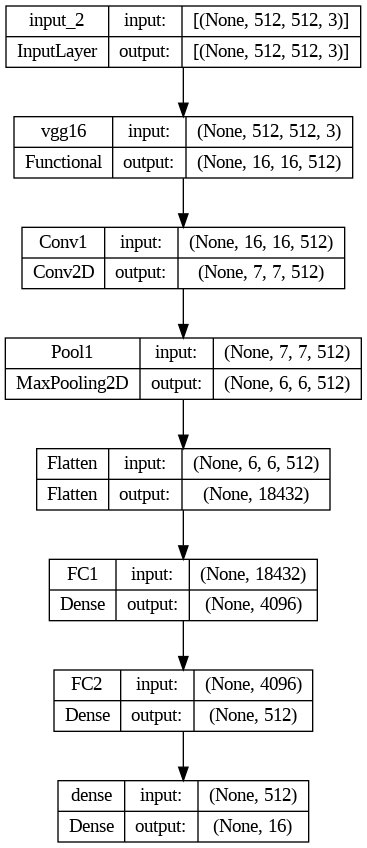

In [32]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

In [33]:
train_steps = len(train_image_generator)
validation_steps = len(valid_image_generator)

In [34]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss= tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])


In [35]:
import datetime
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import TensorBoard
%load_ext tensorboard
logdir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # tensorboard
tensorboard_callback = TensorBoard(log_dir=logdir, histogram_freq=1)

In [36]:
model.fit(train_image_generator, steps_per_epoch=train_steps, validation_data = valid_image_generator, epochs=10, validation_steps=validation_steps,callbacks=[tensorboard_callback])

Epoch 1/10
  10/2010 [..............................] - ETA: 26:03:13 - loss: 14.7430 - categorical_accuracy: 0.0688

KeyboardInterrupt: 

In [ ]:
%tensorboard --logdir logs

In [ ]:
# !rm -rf ./logs/

### Model-2

<pre>
1. Use <a href='https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16'>VGG-16</a> pretrained network without Fully Connected layers and initilize all the weights with Imagenet trained weights.
2. After VGG-16 network without FC layers, don't use FC layers, use conv layers only as Fully connected layer.Any FC
layer can be converted to a CONV layer. This conversion will reduce the No of Trainable parameters in FC layers.
For example, an FC layer with K=4096 that is looking at some input volume of size 7×7×512 can be equivalently expressed as a CONV layer with F=7,P=0,S=1,K=4096.
In other words, we are setting the filter size to be exactly the size of the input volume, and hence the output will
simply be 1×1×4096 since only a single depth column “fits” across the input volume, giving identical result as the
initial FC layer. You can refer <a href='http://cs231n.github.io/convolutional-networks/#convert'>this</a> link to better understanding of using Conv layer in place of fully connected layers.
3. Final architecture will be VGG-16 without FC layers(without top), 2 Conv layers identical to FC layers, 1 output layer for 16 class classification. <b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC -->Output Layer</b>
4. 4.Print model.summary() and plot the architecture of the model.
<a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>Reference for plotting model</a>
5. Train only last 2 Conv layers identical to FC layers, 1 output layer. Don't train the VGG-16 network.
</pre>

In [ ]:
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

In [ ]:
from tensorflow.keras.applications import vgg16

base_model = vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(1000, 780, 3),
    )

base_model.trainable = False

base_model.summary()

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Input, MaxPool2D, Flatten
from tensorflow.keras import Model

inputs = Input(shape=(256, 256, 3))
# We make sure that the base_model is running in inference mode here, by passing `training=False`.
x = base_model(inputs, training=False)

x = Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='Conv1')(x)

x = Conv2D(16,1, activation='relu')(x)
outputs = Flatten()(x)

model = Model(inputs, outputs)
model.summary()

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Input, MaxPool2D, Flatten
from tensorflow.keras import Model

inputs = Input(shape=(256, 256, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)

x = Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=9),name='Conv1')(x)

x = MaxPool2D(pool_size=(2,2),strides=(1,1),padding='valid',data_format='channels_last',name='Pool1')(x)

x = Flatten(data_format='channels_last',name='Flatten')(x)

x = Dense(units=256,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC1')(x)

x = Dense(units=128,activation='relu',kernel_initializer=tf.keras.initializers.glorot_normal(seed=32),name='FC2')(x)

outputs = Dense(16, activation='softmax')(x)

model = Model(inputs, outputs)
model.summary()

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=True
)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss= tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])


In [ ]:
model.fit(train_image_generator, validation_data = valid_image_generator, epochs=2)

### Model-3

<pre>
1. Use same network as Model-2 '<b>INPUT --> VGG-16 without Top layers(FC) --> 2 Conv Layers identical to FC --> Output Layer</b>' and train only Last 6 Layers of VGG-16 network, 2 Conv layers identical to FC layers, 1 output layer.
</pre>

In [ ]:
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

In [ ]:
from tensorflow.keras.applications import vgg16

base_model = vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(1000, 780, 3),
    )

base_model.trainable = True

base_model.summary()

In [ ]:
# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:-6]:
  layer.trainable = False

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Input, MaxPool2D, Flatten
from tensorflow.keras import Model

inputs = Input(shape=(1000, 780, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)

x = Conv2D(64, (31, 24),  activation='relu')(x)

x = Conv2D(16,1, activation='relu')(x)
outputs = Flatten()(x)

model = Model(inputs, outputs)
model.summary()

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=True
)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss= tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])


In [ ]:
model.fit(train_image_generator, validation_data = valid_image_generator, epochs=2)

### Please write your observations or a brief summary of the results that you get after performing transfer learning with reference to model1, model2 and model3